# Mobile Price Classification Problem Statement

## Background
In the rapidly evolving mobile phone market, consumers are presented with a plethora of options, each varying in features and price. As a result, there is a growing need to develop accurate and efficient methods for classifying mobile phones into price categories based on their specifications.

## Problem Statement
The objective of this project is to create an Artificial Neural Network (ANN) algorithm for mobile price classification. The dataset provided includes various features such as battery power, presence of Bluetooth, clock speed, dual SIM capability, front camera resolution (fc), 4G support, internal memory, mobile weight, number of processor cores, and more. These features are crucial in determining the overall value and performance of a mobile device.

## Task
The task at hand is to design and implement an ANN model that can predict the price range of a mobile phone based on its features. The price range is categorized into classes such as 'low-cost,' 'mid-range,' 'high-end,' and 'premium.' The model should learn patterns and relationships from the given dataset to accurately classify mobile phones into these predefined price categories.

## Dataset
The dataset consists of a set of observations, each representing a mobile phone, and includes various numerical and categorical features. The target variable is 'price_range,' representing the price category to which a mobile phone belongs.

## Evaluation
The performance of the ANN model will be assessed using metrics such as accuracy, precision, recall, and F1 score. The goal is to achieve a model that generalizes well to new, unseen data and provides reliable predictions for real-world applications.

## Implementation Steps
1. **Data Preprocessing:** Clean and preprocess the dataset, handling missing values and encoding categorical variables if necessary.
2. **Feature Scaling:** Normalize or standardize the numerical features to ensure a consistent scale for the ANN.
3. **Model Architecture:** Design the architecture of the ANN, including the number of layers, neurons, and activation functions.
4. **Training:** Train the model using the preprocessed dataset and evaluate its performance on a validation set.
5. **Hyperparameter Tuning:** Fine-tune the hyperparameters to optimize the model's performance.
6. **Evaluation:** Assess the final model's performance on a test set to ensure its effectiveness in classifying mobile price ranges.

By successfully developing an ANN model for mobile price classification, we aim to provide a valuable tool for consumers and industry professionals to make informed decisions in the competitive mobile phone market.


## Importing all necessary libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Downloading the data from the google drive link

In [2]:
!gdown https://drive.google.com/uc?id=1NE8EhWK3r2Vy15lqglOB2ejIda-3pAXa
!gdown https://drive.google.com/uc?id=1AkZx9UMfcAV9MnaeE4Bl9DUUekO0c-Kl

Downloading...
From: https://drive.google.com/uc?id=1NE8EhWK3r2Vy15lqglOB2ejIda-3pAXa
To: /content/train.csv
100% 122k/122k [00:00<00:00, 126MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AkZx9UMfcAV9MnaeE4Bl9DUUekO0c-Kl
To: /content/test.csv
100% 63.9k/63.9k [00:00<00:00, 157MB/s]


In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print(train_df.shape)
print(test_df.shape)

(2000, 21)
(1000, 21)


In [4]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
correlation_matrix = train_df.corr()
correlation_with_target = correlation_matrix['price_range'].sort_values(ascending=False)
n = 11
top_n_correlated_features = correlation_with_target.head(n)
print("Top", n, "correlated features with the target variable:")
print(top_n_correlated_features)



Top 11 correlated features with the target variable:
price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
Name: price_range, dtype: float64


In [6]:
top10_features = list(top_n_correlated_features.index)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical


In [8]:
model = Sequential()
model.add(Dense(128, activation = 'tanh', input_shape=(10,)))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(32, activation = "tanh"))
model.add(Dense(4, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 11876 (46.39 KB)
Trainable params: 11876 (46.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [10]:
data = train_df[top10_features[1:]]
labels = np.array(train_df[top10_features[0]])

print(data.shape)
print(labels.shape)

(2000, 10)
(2000,)


In [11]:
one_hot_labels = to_categorical(labels, num_classes=4)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, one_hot_labels, test_size=0.2,
                                                    stratify=labels, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 10)
(400, 10)
(1600, 4)
(400, 4)


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(1600, 10)
(400, 10)


In [16]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data = (X_test_scaled, y_test))

Epoch 1/50
50/50 [==============================] - 2s 8ms/step - loss: 1.2764 - accuracy: 0.4194 - val_loss: 1.0662 - val_accuracy: 0.5875
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.9100 - accuracy: 0.6144 - val_loss: 0.7619 - val_accuracy: 0.7275
Epoch 3/50
50/50 [==============================] - 0s 5ms/step - loss: 0.6568 - accuracy: 0.7519 - val_loss: 0.5208 - val_accuracy: 0.8400
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4723 - accuracy: 0.8269 - val_loss: 0.3585 - val_accuracy: 0.9025
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3450 - accuracy: 0.8850 - val_loss: 0.2545 - val_accuracy: 0.9425
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.2701 - accuracy: 0.9144 - val_loss: 0.2100 - val_accuracy: 0.9400
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 0.2331 - accuracy: 0.9219 - val_loss: 0.1789 - val_accuracy: 0.9325
Epoch 8/50
50/50 [==

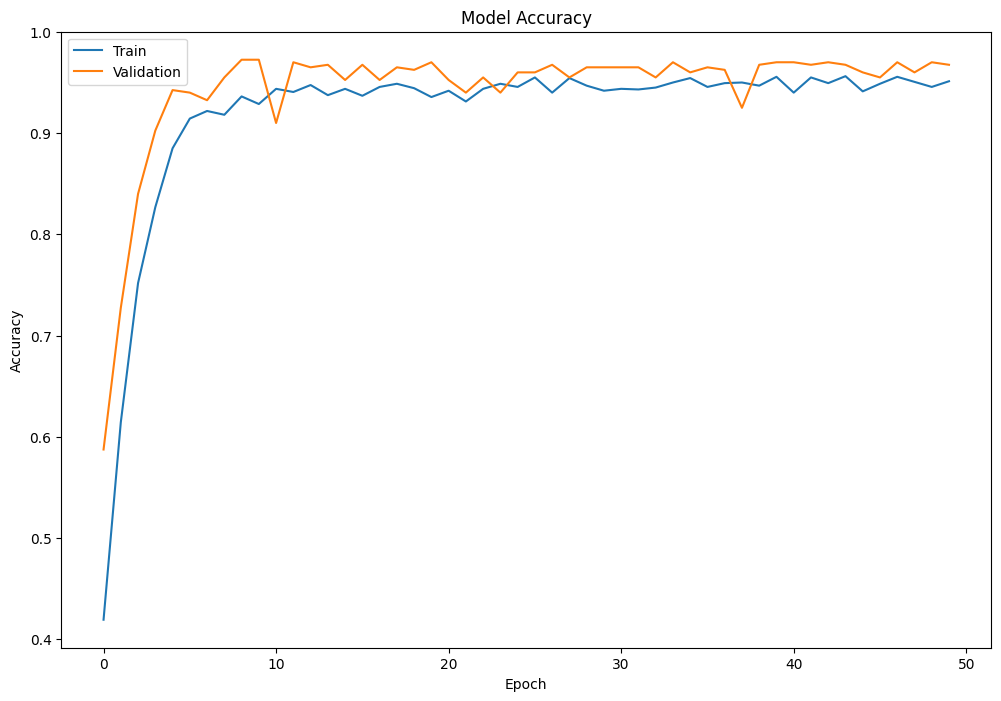

In [17]:
plt.figure(figsize=(12, 8))
plt.title("Training Vs Testing Accuracy")
# Plot training & validation loss values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [18]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test accuracy:", accuracy)


13/13 [==============================] - 0s 2ms/step - loss: 0.0818 - accuracy: 0.9675
Test accuracy: 0.9674999713897705


## Making Predictions in the test data

In [19]:
# predictions = model.predict(X_test_scaled)
# predictions = (np.argmax(pred) for pred in predictions)
# print("Predictions for new data:", predictions)